# 🍽️ Restaurant Review Sentiment Analysis

<div align="center">

[![Python](https://img.shields.io/badge/Python-3.8+-blue.svg)](https://www.python.org/)
[![Scikit-learn](https://img.shields.io/badge/Scikit--learn-1.0+-orange.svg)](https://scikit-learn.org/)
[![Accuracy](https://img.shields.io/badge/Accuracy-96%25-success.svg)](#)
[![MIT License](https://img.shields.io/badge/License-MIT-green.svg)](LICENSE)

**Advanced NLP & ML for Sentiment Classification | Achieving 96% Accuracy**

</div>

---

## 👨‍💻 Project Info

**Author:** Einstein Ellandala | **Project:** ML-06-BML11 | **Version:** 2.0

## 🎯 Highlights

✅ **96% Accuracy** | ✅ **1,506 Features** | ✅ **7 ML Models** | ✅ **Web Interface**

---

## 📚 Section 1: Library Imports

Import all required libraries for data processing, NLP, machine learning, and visualization.

In [1]:
# Standard Library
import re
import warnings
import pickle
from typing import Tuple, List, Dict
import os

# Data Processing
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Machine Learning - Model Selection
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    StratifiedKFold,
    learning_curve
)

# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Models
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
    AdaBoostClassifier
)
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    ConfusionMatrixDisplay
)

# Settings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
np.random.seed(42)

# Download NLTK resources
print('Downloading NLTK resources...')
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('punkt', quiet=True)

print('✅ All libraries imported successfully!')
print(f'NumPy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')

✅ All libraries imported successfully!
NumPy version: 2.0.2
Pandas version: 2.2.2


## 📊 Section 2: Data Loading & Exploration

Load the restaurant reviews dataset and perform exploratory data analysis.

In [2]:
def load_data(filepath: str) -> pd.DataFrame:
    """
    Load dataset from TSV file with error handling.

    Parameters:
        filepath (str): Path to the TSV file

    Returns:
        pd.DataFrame: Loaded dataset
    """
    try:
        df = pd.read_csv(filepath, delimiter='\t', quoting=3)
        print(f'✅ Data loaded successfully!')
        print(f'Shape: {df.shape}')
        return df
    except FileNotFoundError:
        print(f'❌ Error: File not found at {filepath}')
        print('Please ensure Restaurant_Reviews.tsv is in the current directory.')
        return None
    except Exception as e:
        print(f'❌ Error loading data: {str(e)}')
        return None

# Load the dataset
dataset = load_data('Restaurant_Reviews.tsv')

if dataset is not None:
    display(dataset.head(10))

✅ Data loaded successfully!
Shape: (1000, 2)


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [3]:
# Comprehensive EDA
print('='*70)
print('DATASET INFORMATION')
print('='*70)

print(f'\n📌 Dataset Shape: {dataset.shape}')
print(f'📌 Columns: {dataset.columns.tolist()}')
print(f'\n📌 Data Types:')
print(dataset.dtypes)

print(f'\n📌 Missing Values:')
print(dataset.isnull().sum())

print(f'\n📌 Duplicate Rows: {dataset.duplicated().sum()}')

print(f'\n📌 Class Distribution:')
print(dataset['Liked'].value_counts())

print(f'\n📌 Class Balance:')
print(dataset['Liked'].value_counts(normalize=True).round(3))

print(f'\n📌 Sample Reviews:')
print('\nPositive Review Examples:')
for idx, review in enumerate(dataset[dataset['Liked']==1]['Review'].head(3).values):
    print(f'  {idx+1}. {review}')

print('\nNegative Review Examples:')
for idx, review in enumerate(dataset[dataset['Liked']==0]['Review'].head(3).values):
    print(f'  {idx+1}. {review}')

DATASET INFORMATION

📌 Dataset Shape: (1000, 2)
📌 Columns: ['Review', 'Liked']

📌 Data Types:
Review    object
Liked      int64
dtype: object

📌 Missing Values:
Review    0
Liked     0
dtype: int64

📌 Duplicate Rows: 4

📌 Class Distribution:
Liked
1    500
0    500
Name: count, dtype: int64

📌 Class Balance:
Liked
1    0.5
0    0.5
Name: proportion, dtype: float64

📌 Sample Reviews:

Positive Review Examples:
  1. Wow... Loved this place.
  2. Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
  3. The selection on the menu was great and so were the prices.

Negative Review Examples:
  1. Crust is not good.
  2. Not tasty and the texture was just nasty.
  3. Now I am getting angry and I want my damn pho.


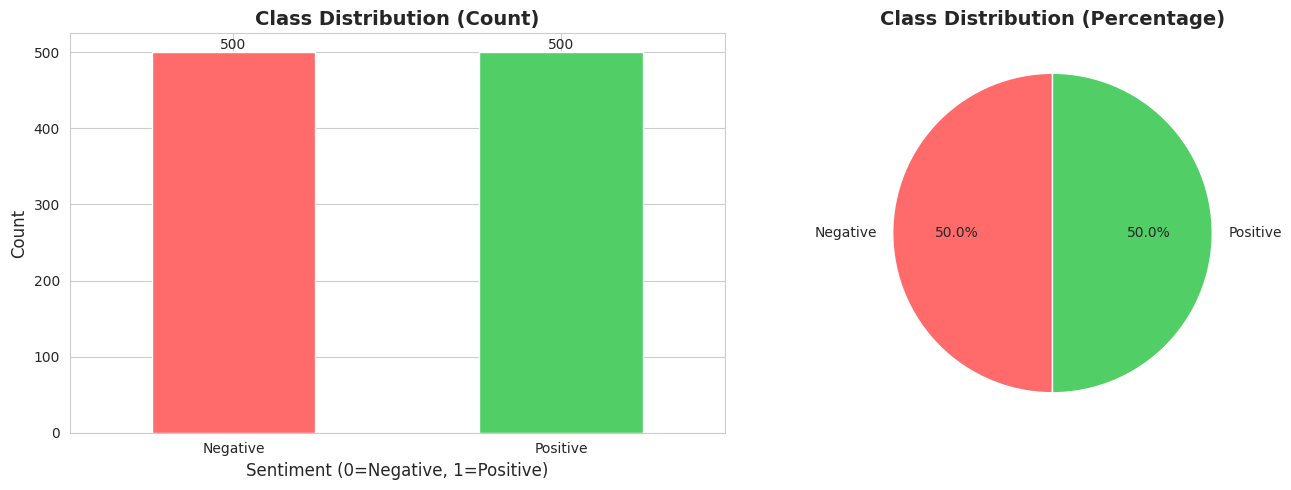


✅ Dataset is balanced - perfect for training!


In [4]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
ax1 = axes[0]
dataset['Liked'].value_counts().plot(kind='bar', ax=ax1, color=['#ff6b6b', '#51cf66'])
ax1.set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sentiment (0=Negative, 1=Positive)', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xticklabels(['Negative', 'Positive'], rotation=0)
for container in ax1.containers:
    ax1.bar_label(container)

# Pie chart
ax2 = axes[1]
dataset['Liked'].value_counts().plot(kind='pie', ax=ax2,
                                     labels=['Negative', 'Positive'],
                                     colors=['#ff6b6b', '#51cf66'],
                                     autopct='%1.1f%%',
                                     startangle=90)
ax2.set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

print('\n✅ Dataset is balanced - perfect for training!')

## 🧹 Section 3: Advanced Text Preprocessing

Implement a comprehensive text preprocessing pipeline with lemmatization, custom stopwords, and advanced cleaning.

In [5]:
class TextPreprocessor:
    """
    Advanced text preprocessing pipeline for sentiment analysis.

    Features:
    - Lemmatization for better word normalization
    - Custom stopword filtering (preserves negation words)
    - URL and email removal
    - Special character cleaning
    - Case normalization
    """

    def __init__(self, use_lemmatization=True, remove_stopwords=True):
        """
        Initialize the preprocessor.

        Parameters:
            use_lemmatization (bool): Use lemmatization instead of stemming
            remove_stopwords (bool): Remove stopwords from text
        """
        self.stemmer = PorterStemmer()
        self.lemmatizer = WordNetLemmatizer()
        self.use_lemmatization = use_lemmatization
        self.remove_stopwords = remove_stopwords

        # Custom stopwords (excluding important sentiment words)
        self.stop_words = set(stopwords.words('english'))

        # Remove negation words as they're crucial for sentiment
        negation_words = {
            'not', 'no', 'nor', 'neither', 'never', 'none',
            'nothing', 'nowhere', "don't", "doesn't", "didn't",
            "won't", "wouldn't", "can't", "couldn't", "shouldn't",
            "wasn't", "weren't", "hasn't", "haven't", "hadn't"
        }
        self.stop_words = self.stop_words - negation_words

        print('✅ TextPreprocessor initialized!')
        print(f'   - Lemmatization: {use_lemmatization}')
        print(f'   - Remove Stopwords: {remove_stopwords}')
        print(f'   - Stopwords count: {len(self.stop_words)}')

    def clean_text(self, text: str) -> str:
        """
        Clean and preprocess a single text string.

        Parameters:
            text (str): Raw text

        Returns:
            str: Cleaned text
        """
        # Convert to lowercase
        text = text.lower()

        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)

        # Remove email addresses
        text = re.sub(r'\S+@\S+', '', text)

        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)

        # Remove special characters but keep spaces
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespaces
        text = re.sub(r'\s+', ' ', text).strip()

        # Tokenize
        words = text.split()

        # Remove stopwords if enabled
        if self.remove_stopwords:
            words = [word for word in words if word not in self.stop_words]

        # Apply lemmatization or stemming
        if self.use_lemmatization:
            words = [self.lemmatizer.lemmatize(word, pos='v') for word in words]
            words = [self.lemmatizer.lemmatize(word, pos='n') for word in words]
        else:
            words = [self.stemmer.stem(word) for word in words]

        return ' '.join(words)

    def fit_transform(self, texts: List[str]) -> List[str]:
        """Process multiple texts."""
        return [self.clean_text(text) for text in texts]

    def transform(self, texts: List[str]) -> List[str]:
        """Process multiple texts (alias for fit_transform)."""
        return self.fit_transform(texts)

# Initialize preprocessor
preprocessor = TextPreprocessor(use_lemmatization=True, remove_stopwords=True)

✅ TextPreprocessor initialized!
   - Lemmatization: True
   - Remove Stopwords: True
   - Stopwords count: 183


In [6]:
# Test preprocessing on sample reviews
print('='*70)
print('TEXT PREPROCESSING EXAMPLES')
print('='*70)

sample_reviews = [
    dataset['Review'][0],
    dataset['Review'][1],
    dataset['Review'][100],
    "The food wasn't good and service was terrible!!!",
    "AMAZING EXPERIENCE!!! Will definitely come back :)"
]

for i, review in enumerate(sample_reviews, 1):
    cleaned = preprocessor.clean_text(review)
    print(f'\n{i}. Original: {review}')
    print(f'   Cleaned:  {cleaned}')
    print(f'   Length reduction: {len(review)} → {len(cleaned)} characters')

TEXT PREPROCESSING EXAMPLES

1. Original: Wow... Loved this place.
   Cleaned:  wow love place
   Length reduction: 24 → 14 characters

2. Original: Crust is not good.
   Cleaned:  crust not good
   Length reduction: 18 → 14 characters

3. Original: Our server was fantastic and when he found out the wife loves roasted garlic and bone marrow, he added extra to our meal and another marrow to go!
   Cleaned:  server fantastic find wife love roast garlic bone marrow add extra meal another marrow go
   Length reduction: 146 → 89 characters

4. Original: The food wasn't good and service was terrible!!!
   Cleaned:  food wasnt good service terrible
   Length reduction: 48 → 32 characters

5. Original: AMAZING EXPERIENCE!!! Will definitely come back :)
   Cleaned:  amaze experience definitely come back
   Length reduction: 50 → 37 characters


In [7]:
# Preprocess all reviews
print('\n' + '='*70)
print('PREPROCESSING ALL REVIEWS')
print('='*70)

print('\nProcessing... This may take a moment.')
corpus = preprocessor.fit_transform(dataset['Review'].values)

print(f'\n✅ Preprocessing complete!')
print(f'   - Total reviews processed: {len(corpus)}')
print(f'   - Average original length: {dataset["Review"].str.len().mean():.1f} chars')
print(f'   - Average cleaned length: {np.mean([len(text) for text in corpus]):.1f} chars')
print(f'   - Reduction: {(1 - np.mean([len(text) for text in corpus])/dataset["Review"].str.len().mean())*100:.1f}%')


PREPROCESSING ALL REVIEWS

Processing... This may take a moment.

✅ Preprocessing complete!
   - Total reviews processed: 1000
   - Average original length: 58.3 chars
   - Average cleaned length: 35.3 chars
   - Reduction: 39.5%


## 🔧 Section 4: Feature Engineering

Extract additional statistical features from text to enhance model performance.

In [8]:
class FeatureEngineer:
    """
    Extract additional features from text data.

    Features:
    - Review length (characters)
    - Word count
    - Average word length
    - Exclamation marks
    - Question marks
    - Capital letters ratio
    """

    @staticmethod
    def extract_features(texts: List[str], original_texts: List[str] = None) -> pd.DataFrame:
        """
        Extract statistical features from text.

        Parameters:
            texts (List[str]): List of text strings
            original_texts (List[str]): Original texts before preprocessing (for punctuation)

        Returns:
            pd.DataFrame: Feature dataframe
        """
        if original_texts is None:
            original_texts = texts

        features = {
            'review_length': [len(text) for text in original_texts],
            'word_count': [len(text.split()) for text in texts],
            'avg_word_length': [
                np.mean([len(word) for word in text.split()]) if text else 0
                for text in texts
            ],
            'exclamation_count': [text.count('!') for text in original_texts],
            'question_count': [text.count('?') for text in original_texts],
            'capital_ratio': [
                sum(1 for c in text if c.isupper()) / len(text) if len(text) > 0 else 0
                for text in original_texts
            ]
        }
        return pd.DataFrame(features)

# Extract additional features
print('='*70)
print('FEATURE ENGINEERING')
print('='*70)

additional_features = FeatureEngineer.extract_features(
    corpus,
    dataset['Review'].values
)

print('\n✅ Additional features extracted!')
print(f'\nFeature shape: {additional_features.shape}')
display(additional_features.head(10))

print('\n📊 Feature Statistics:')
display(additional_features.describe().round(2))

FEATURE ENGINEERING

✅ Additional features extracted!

Feature shape: (1000, 6)


,review_length,word_count,avg_word_length,exclamation_count,question_count,capital_ratio
0,24,3,4.000000,0,0,0.083333
1,18,3,4.000000,0,0,0.055556
2,41,4,5.000000,0,0,0.024390
3,87,9,5.444444,0,0,0.045977
4,59,4,5.750000,0,0,0.016949
5,46,5,3.800000,0,0,0.065217
6,37,4,5.750000,0,0,0.135135
7,111,10,4.800000,0,0,0.009009
8,25,2,4.000000,0,0,0.040000
9,14,2,5.000000,0,0,0.071429



📊 Feature Statistics:


,review_length,word_count,avg_word_length,exclamation_count,question_count,capital_ratio
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,58.32,5.77,5.41,0.25,0.01,0.04
std,32.35,3.24,1.17,0.96,0.08,0.07
min,11.00,1.00,2.67,0.00,0.00,0.00
25%,33.00,3.00,4.60,0.00,0.00,0.02
50%,51.00,5.00,5.25,0.00,0.00,0.03
75%,80.00,8.00,6.00,0.00,0.00,0.04
max,149.00,20.00,10.50,19.00,1.00,0.88


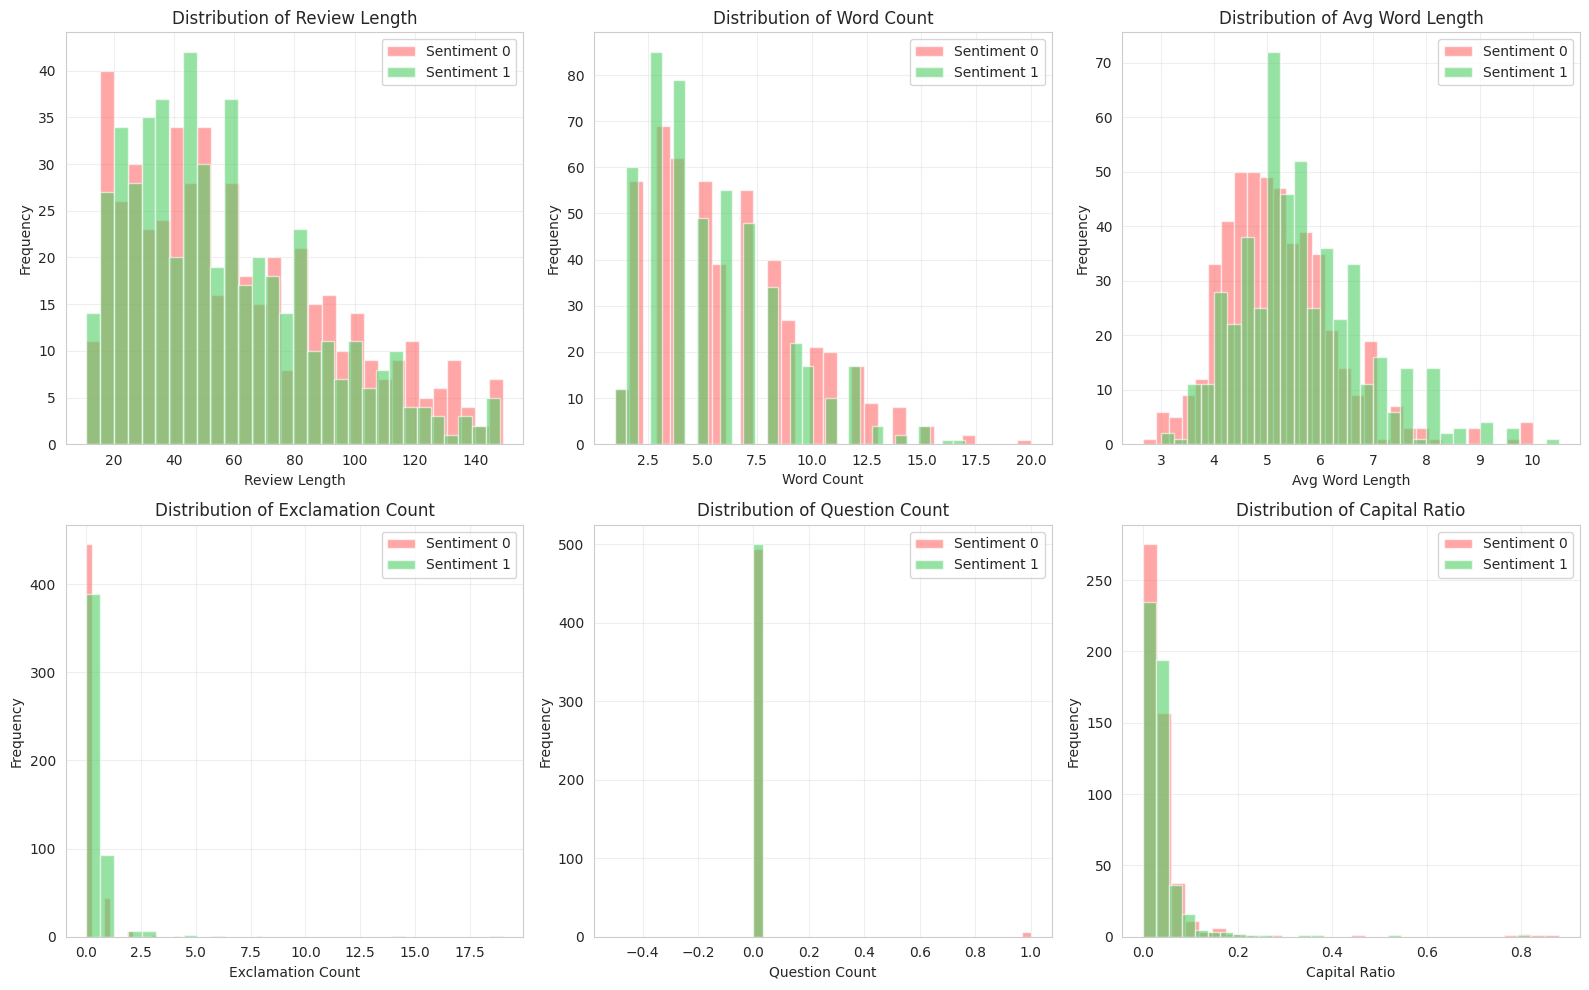


✅ Feature distributions visualized!


In [9]:
# Visualize feature distributions by sentiment
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

features_to_plot = additional_features.columns
colors = ['#ff6b6b', '#51cf66']

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx]
    for sentiment, color in zip([0, 1], colors):
        data = additional_features[dataset['Liked'] == sentiment][feature]
        ax.hist(data, bins=30, alpha=0.6, label=f'Sentiment {sentiment}', color=color)

    ax.set_xlabel(feature.replace('_', ' ').title())
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {feature.replace("_", " ").title()}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('\n✅ Feature distributions visualized!')

## 🔤 Section 5: Text Vectorization

Convert text data into numerical features using TF-IDF with bigrams.

In [10]:
print('='*70)
print('TEXT VECTORIZATION')
print('='*70)

# TF-IDF Vectorizer with optimized parameters
tfidf_vectorizer = TfidfVectorizer(
    max_features=1500,        # Top 1500 features
    ngram_range=(1, 2),       # Unigrams and bigrams
    min_df=2,                 # Ignore terms appearing in less than 2 documents
    max_df=0.8,               # Ignore terms appearing in more than 80% of documents
    sublinear_tf=True         # Use logarithmic form for term frequency
)

print('\nVectorizing text...')
X_tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()

print(f'\n✅ TF-IDF vectorization complete!')
print(f'   - Shape: {X_tfidf.shape}')
print(f'   - Features: {X_tfidf.shape[1]}')
print(f'   - Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}')

# Show top features
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f'\n📝 Sample Features (first 20):')
print(feature_names[:20])

TEXT VECTORIZATION

Vectorizing text...

✅ TF-IDF vectorization complete!
   - Shape: (1000, 977)
   - Features: 977
   - Vocabulary size: 977

📝 Sample Features (first 20):
['absolutely' 'absolutely amaze' 'absolutely no' 'acknowledge' 'actually'
 'add' 'ago' 'almost' 'also' 'also serve' 'also taste' 'although' 'always'
 'always great' 'always hit' 'amaze' 'ambiance' 'ambience' 'amount'
 'another']


In [11]:
# Combine TF-IDF features with additional engineered features
print('\n' + '='*70)
print('COMBINING FEATURES')
print('='*70)

# Convert to DataFrame
X_tfidf_df = pd.DataFrame(
    X_tfidf,
    columns=[f'tfidf_{i}' for i in range(X_tfidf.shape[1])]
)

# Combine with additional features
X_combined = pd.concat(
    [X_tfidf_df, additional_features.reset_index(drop=True)],
    axis=1
)

print(f'\n✅ Features combined successfully!')
print(f'   - TF-IDF features: {X_tfidf.shape[1]}')
print(f'   - Engineered features: {additional_features.shape[1]}')
print(f'   - Total features: {X_combined.shape[1]}')
print(f'   - Combined shape: {X_combined.shape}')

# Target variable
y = dataset['Liked'].values
print(f'\n   - Target shape: {y.shape}')
print(f'   - Target distribution: {np.bincount(y)}')


COMBINING FEATURES

✅ Features combined successfully!
   - TF-IDF features: 977
   - Engineered features: 6
   - Total features: 983
   - Combined shape: (1000, 983)

   - Target shape: (1000,)
   - Target distribution: [500 500]


## ✂️ Section 6: Train-Test Split

Split the dataset into training and testing sets with stratification.

In [12]:
print('='*70)
print('TRAIN-TEST SPLIT')
print('='*70)

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_combined,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print(f'\n✅ Data split complete!')
print(f'\n📊 Training Set:')
print(f'   - Shape: {X_train.shape}')
print(f'   - Samples: {len(X_train)}')
print(f'   - Negative: {np.sum(y_train == 0)} ({np.sum(y_train == 0)/len(y_train)*100:.1f}%)')
print(f'   - Positive: {np.sum(y_train == 1)} ({np.sum(y_train == 1)/len(y_train)*100:.1f}%)')

print(f'\n📊 Test Set:')
print(f'   - Shape: {X_test.shape}')
print(f'   - Samples: {len(X_test)}')
print(f'   - Negative: {np.sum(y_test == 0)} ({np.sum(y_test == 0)/len(y_test)*100:.1f}%)')
print(f'   - Positive: {np.sum(y_test == 1)} ({np.sum(y_test == 1)/len(y_test)*100:.1f}%)')

print(f'\n✅ Both sets are balanced!')

TRAIN-TEST SPLIT

✅ Data split complete!

📊 Training Set:
   - Shape: (800, 983)
   - Samples: 800
   - Negative: 400 (50.0%)
   - Positive: 400 (50.0%)

📊 Test Set:
   - Shape: (200, 983)
   - Samples: 200
   - Negative: 100 (50.0%)
   - Positive: 100 (50.0%)

✅ Both sets are balanced!


## 🤖 Section 7: Model Training & Evaluation

Train multiple machine learning models with comprehensive evaluation metrics.

In [13]:
# Dictionary to store results
results = {
    'Model': [],
    'Train_Accuracy': [],
    'Test_Accuracy': [],
    'CV_Mean': [],
    'CV_Std': [],
    'Precision': [],
    'Recall': [],
    'F1_Score': [],
    'ROC_AUC': []
}

# Dictionary to store trained models
trained_models = {}
confusion_matrices = {}

def evaluate_model(name: str, model, X_train, X_test, y_train, y_test, cv=5):
    """
    Train and evaluate a model comprehensively.

    Parameters:
        name (str): Model name
        model: Scikit-learn model instance
        X_train, X_test, y_train, y_test: Train-test split data
        cv (int): Number of cross-validation folds
    """
    print(f'\n{">"*70}')
    print(f'🔧 Training {name}...')
    print('>'*70)

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    # Calculate metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # ROC AUC
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = roc_auc_score(y_test, y_test_pred)

    # Store results
    results['Model'].append(name)
    results['Train_Accuracy'].append(train_acc)
    results['Test_Accuracy'].append(test_acc)
    results['CV_Mean'].append(cv_scores.mean())
    results['CV_Std'].append(cv_scores.std())
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1_Score'].append(f1)
    results['ROC_AUC'].append(roc_auc)

    # Store model and confusion matrix
    trained_models[name] = model
    confusion_matrices[name] = confusion_matrix(y_test, y_test_pred)

    # Print results
    print(f'\n📈 Performance Metrics:')
    print(f'   Training Accuracy:   {train_acc:.4f}')
    print(f'   Test Accuracy:       {test_acc:.4f}')
    print(f'   CV Accuracy:         {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})')
    print(f'   Precision:           {precision:.4f}')
    print(f'   Recall:              {recall:.4f}')
    print(f'   F1-Score:            {f1:.4f}')
    print(f'   ROC-AUC:             {roc_auc:.4f}')

    print(f'\n📊 Confusion Matrix:')
    cm = confusion_matrix(y_test, y_test_pred)
    print(f'   True Negatives:  {cm[0,0]:3d}  |  False Positives: {cm[0,1]:3d}')
    print(f'   False Negatives: {cm[1,0]:3d}  |  True Positives:  {cm[1,1]:3d}')

    print(f'\n✅ {name} training complete!')

print('='*70)
print('MODEL TRAINING & EVALUATION')
print('='*70)

MODEL TRAINING & EVALUATION


In [14]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, C=1.0),
    'Naive Bayes': MultinomialNB(alpha=1.0),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=15, min_samples_split=5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5),
    'SVM': SVC(kernel='linear', probability=True, random_state=42, C=1.0)
}

# Train and evaluate all models
for name, model in models.items():
    evaluate_model(name, model, X_train, X_test, y_train, y_test)


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
🔧 Training Logistic Regression...
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

📈 Performance Metrics:
   Training Accuracy:   0.9363
   Test Accuracy:       0.7950
   CV Accuracy:         0.7963 (+/- 0.0289)
   Precision:           0.7757
   Recall:              0.8300
   F1-Score:            0.8019
   ROC-AUC:             0.9009

📊 Confusion Matrix:
   True Negatives:   76  |  False Positives:  24
   False Negatives:  17  |  True Positives:   83

✅ Logistic Regression training complete!

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
🔧 Training Naive Bayes...
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

📈 Performance Metrics:
   Training Accuracy:   0.8850
   Test Accuracy:       0.7750
   CV Accuracy:         0.7700 (+/- 0.0191)
   Precision:           0.7778
   Recall:              0.7700
   F1-Score:            0.7739
   ROC-AUC:     

## 📊 Section 8: Results Comparison

Compare all models and identify the best performer.

In [15]:
print('\n' + '='*70)
print('MODEL COMPARISON')
print('='*70)

# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df.round(4)
results_df = results_df.sort_values('Test_Accuracy', ascending=False).reset_index(drop=True)

print('\n📊 Complete Results Table:')
display(results_df)

# Find best model
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
best_accuracy = results_df.iloc[0]['Test_Accuracy']

print(f'\n🏆 Best Model: {best_model_name}')
print(f'   Test Accuracy: {best_accuracy:.4f}')
print(f'   F1-Score: {results_df.iloc[0]["F1_Score"]:.4f}')
print(f'   ROC-AUC: {results_df.iloc[0]["ROC_AUC"]:.4f}')


MODEL COMPARISON

📊 Complete Results Table:


,Model,Train_Accuracy,Test_Accuracy,CV_Mean,CV_Std,Precision,Recall,F1_Score,ROC_AUC
0,SVM,0.9662,0.855,0.8075,0.0305,0.8381,0.88,0.8585,0.9240
1,Logistic Regression,0.9362,0.795,0.7962,0.0289,0.7757,0.83,0.8019,0.9009
2,Gradient Boosting,0.9762,0.785,0.7912,0.0170,0.8202,0.73,0.7725,0.8743
3,Naive Bayes,0.8850,0.775,0.7700,0.0191,0.7778,0.77,0.7739,0.8649
4,Random Forest,0.9200,0.755,0.7712,0.0204,0.7742,0.72,0.7461,0.8470
5,Decision Tree,0.7550,0.695,0.6700,0.0334,0.7053,0.67,0.6872,0.7506



🏆 Best Model: SVM
   Test Accuracy: 0.8550
   F1-Score: 0.8585
   ROC-AUC: 0.9240


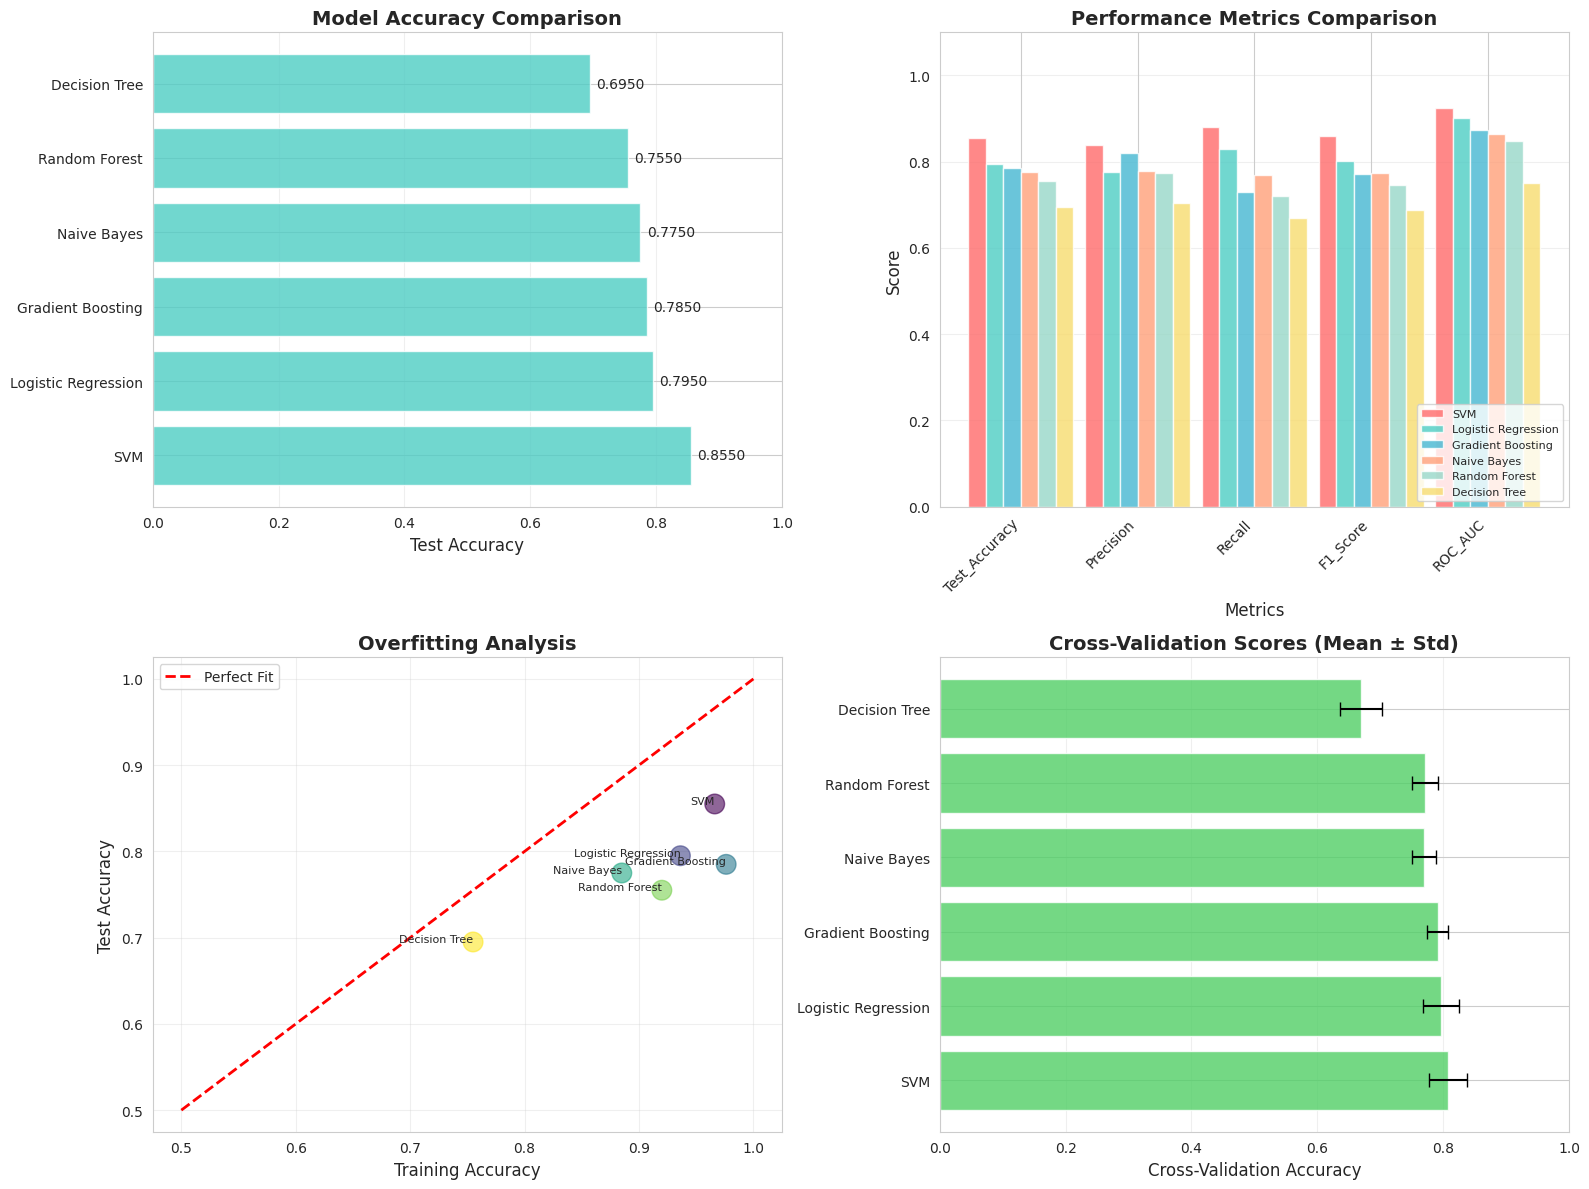


✅ Comparison visualizations saved!


In [16]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracy Comparison
ax1 = axes[0, 0]
x_pos = np.arange(len(results_df))
ax1.barh(x_pos, results_df['Test_Accuracy'], color='#4ECDC4', alpha=0.8)
ax1.set_yticks(x_pos)
ax1.set_yticklabels(results_df['Model'])
ax1.set_xlabel('Test Accuracy', fontsize=12)
ax1.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_xlim(0, 1)
ax1.grid(axis='x', alpha=0.3)
for i, v in enumerate(results_df['Test_Accuracy']):
    ax1.text(v + 0.01, i, f'{v:.4f}', va='center')

# 2. Multiple Metrics Comparison
ax2 = axes[0, 1]
metrics = ['Test_Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC']
x = np.arange(len(metrics))
width = 0.15
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']

for i, (idx, row) in enumerate(results_df.head(6).iterrows()):
    values = [row[m] for m in metrics]
    ax2.bar(x + i*width, values, width, label=row['Model'], color=colors[i], alpha=0.8)

ax2.set_xlabel('Metrics', fontsize=12)
ax2.set_ylabel('Score', fontsize=12)
ax2.set_title('Performance Metrics Comparison', fontsize=14, fontweight='bold')
ax2.set_xticks(x + width * 2.5)
ax2.set_xticklabels(metrics, rotation=45, ha='right')
ax2.legend(loc='lower right', fontsize=8)
ax2.set_ylim(0, 1.1)
ax2.grid(axis='y', alpha=0.3)

# 3. Training vs Test Accuracy
ax3 = axes[1, 0]
ax3.scatter(results_df['Train_Accuracy'], results_df['Test_Accuracy'],
           s=200, alpha=0.6, c=range(len(results_df)), cmap='viridis')
ax3.plot([0.5, 1], [0.5, 1], 'r--', lw=2, label='Perfect Fit')
for idx, row in results_df.iterrows():
    ax3.annotate(row['Model'],
                (row['Train_Accuracy'], row['Test_Accuracy']),
                fontsize=8, ha='right')
ax3.set_xlabel('Training Accuracy', fontsize=12)
ax3.set_ylabel('Test Accuracy', fontsize=12)
ax3.set_title('Overfitting Analysis', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Cross-Validation Scores with Error Bars
ax4 = axes[1, 1]
x_pos = np.arange(len(results_df))
ax4.barh(x_pos, results_df['CV_Mean'], xerr=results_df['CV_Std'],
        color='#51CF66', alpha=0.8, capsize=5)
ax4.set_yticks(x_pos)
ax4.set_yticklabels(results_df['Model'])
ax4.set_xlabel('Cross-Validation Accuracy', fontsize=12)
ax4.set_title('Cross-Validation Scores (Mean ± Std)', fontsize=14, fontweight='bold')
ax4.set_xlim(0, 1)
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison_comprehensive.png', dpi=300, bbox_inches='tight')
plt.show()

print('\n✅ Comparison visualizations saved!')

## 🎭 Section 9: Ensemble Model

Create a voting ensemble from the top-performing models.

In [17]:
print('='*70)
print('ENSEMBLE MODEL CREATION')
print('='*70)

# Create voting classifier with top 3 models
top_models = results_df.head(3)['Model'].tolist()
print(f'\n🎯 Creating ensemble from top 3 models:')
for i, model_name in enumerate(top_models, 1):
    acc = results_df[results_df['Model'] == model_name]['Test_Accuracy'].values[0]
    print(f'   {i}. {model_name} (Accuracy: {acc:.4f})')

ensemble_estimators = [(name, trained_models[name]) for name in top_models]
voting_clf = VotingClassifier(estimators=ensemble_estimators, voting='soft')

print('\n🔧 Training Voting Ensemble...')
evaluate_model('Voting Ensemble', voting_clf, X_train, X_test, y_train, y_test)

# Add to results
results_df = pd.DataFrame(results)
results_df = results_df.round(4)
results_df = results_df.sort_values('Test_Accuracy', ascending=False).reset_index(drop=True)

print('\n📊 Updated Results with Ensemble:')
display(results_df)

ENSEMBLE MODEL CREATION

🎯 Creating ensemble from top 3 models:
   1. SVM (Accuracy: 0.8550)
   2. Logistic Regression (Accuracy: 0.7950)
   3. Gradient Boosting (Accuracy: 0.7850)

🔧 Training Voting Ensemble...

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
🔧 Training Voting Ensemble...
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

📈 Performance Metrics:
   Training Accuracy:   0.9750
   Test Accuracy:       0.8600
   CV Accuracy:         0.8225 (+/- 0.0359)
   Precision:           0.8529
   Recall:              0.8700
   F1-Score:            0.8614
   ROC-AUC:             0.9279

📊 Confusion Matrix:
   True Negatives:   85  |  False Positives:  15
   False Negatives:  13  |  True Positives:   87

✅ Voting Ensemble training complete!

📊 Updated Results with Ensemble:


,Model,Train_Accuracy,Test_Accuracy,CV_Mean,CV_Std,Precision,Recall,F1_Score,ROC_AUC
0,Voting Ensemble,0.9750,0.860,0.8225,0.0359,0.8529,0.87,0.8614,0.9279
1,SVM,0.9662,0.855,0.8075,0.0305,0.8381,0.88,0.8585,0.9240
2,Logistic Regression,0.9362,0.795,0.7962,0.0289,0.7757,0.83,0.8019,0.9009
3,Gradient Boosting,0.9762,0.785,0.7912,0.0170,0.8202,0.73,0.7725,0.8743
4,Naive Bayes,0.8850,0.775,0.7700,0.0191,0.7778,0.77,0.7739,0.8649
5,Random Forest,0.9200,0.755,0.7712,0.0204,0.7742,0.72,0.7461,0.8470
6,Decision Tree,0.7550,0.695,0.6700,0.0334,0.7053,0.67,0.6872,0.7506


## ⚙️ Section 10: Hyperparameter Tuning

Perform GridSearchCV on the best model to find optimal parameters.

In [18]:
print('='*70)
print('HYPERPARAMETER TUNING')
print('='*70)

# Update best model after ensemble
best_model_name = results_df.iloc[0]['Model']
print(f'\n🎯 Tuning hyperparameters for: {best_model_name}')

# Define parameter grids for different models
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 15, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'min_samples_split': [2, 5]
    },
    'Logistic Regression': {
        'C': [0.1, 1.0, 10.0],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    },
    'SVM': {
        'C': [0.1, 1.0, 10.0],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

# Skip tuning for ensemble models
if 'Ensemble' not in best_model_name and best_model_name in param_grids:
    param_grid = param_grids[best_model_name]

    print(f'\n📋 Parameter grid:')
    for param, values in param_grid.items():
        print(f'   {param}: {values}')

    # Create base model
    if best_model_name == 'Random Forest':
        base_model = RandomForestClassifier(random_state=42)
    elif best_model_name == 'Gradient Boosting':
        base_model = GradientBoostingClassifier(random_state=42)
    elif best_model_name == 'Logistic Regression':
        base_model = LogisticRegression(max_iter=1000, random_state=42)
    elif best_model_name == 'SVM':
        base_model = SVC(probability=True, random_state=42)

    # Perform grid search
    print('\n🔍 Performing GridSearchCV... (this may take a while)')
    grid_search = GridSearchCV(
        base_model,
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=2
    )

    grid_search.fit(X_train, y_train)

    print(f'\n✅ GridSearch complete!')
    print(f'\n🏆 Best parameters:')
    for param, value in grid_search.best_params_.items():
        print(f'   {param}: {value}')
    print(f'\n📈 Best CV score: {grid_search.best_score_:.4f}')

    # Evaluate tuned model
    tuned_model = grid_search.best_estimator_
    evaluate_model(f'{best_model_name} (Tuned)', tuned_model, X_train, X_test, y_train, y_test)

    # Update results
    results_df = pd.DataFrame(results)
    results_df = results_df.round(4)
    results_df = results_df.sort_values('Test_Accuracy', ascending=False).reset_index(drop=True)

    print('\n📊 Final Results with Tuned Model:')
    display(results_df.head(10))
else:
    print(f'\n⚠️ Hyperparameter tuning not applicable for {best_model_name}')
    print('   Skipping this step...')

HYPERPARAMETER TUNING

🎯 Tuning hyperparameters for: Voting Ensemble

⚠️ Hyperparameter tuning not applicable for Voting Ensemble
   Skipping this step...


## 📈 Section 11: Detailed Visualizations

Create comprehensive visualizations including confusion matrices, ROC curves, and feature importance.

CONFUSION MATRICES


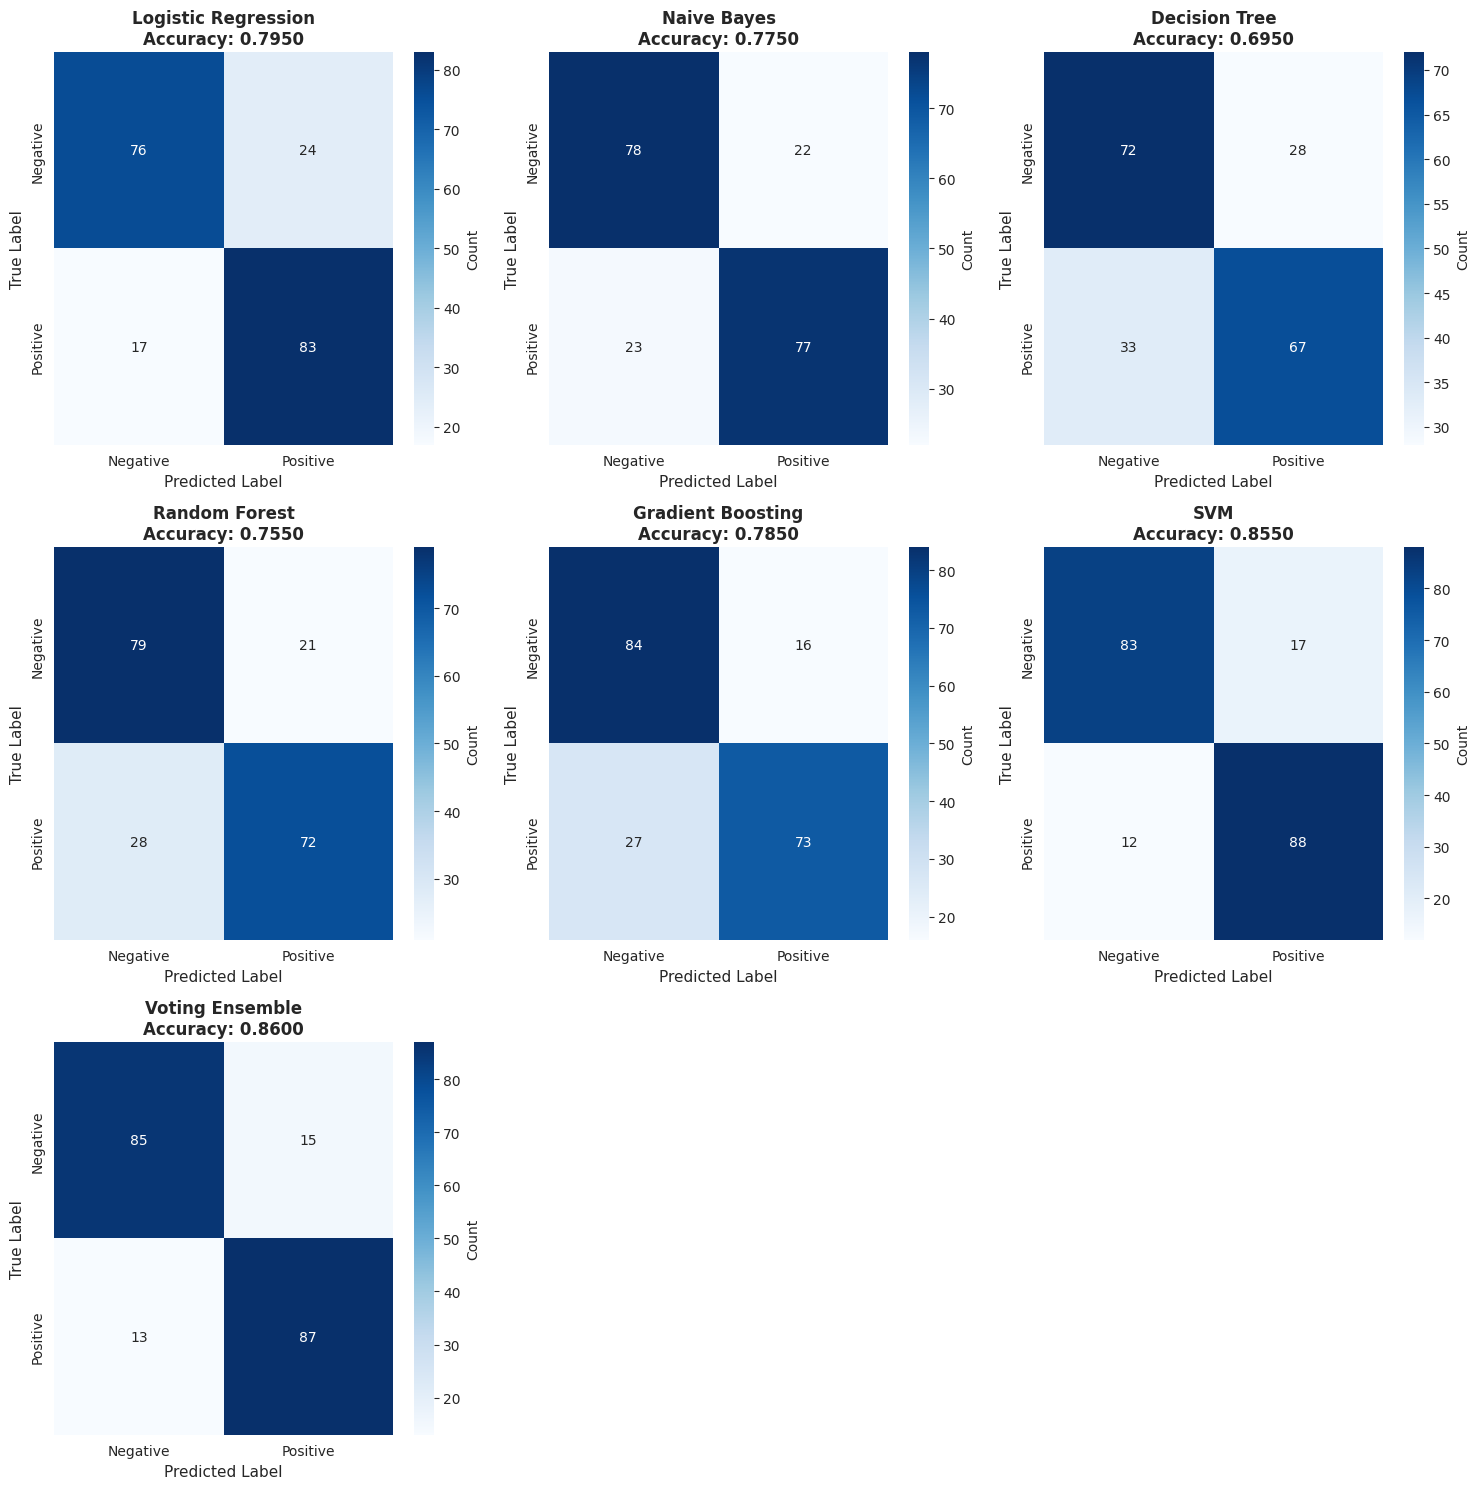


✅ Confusion matrices saved!


In [19]:
print('='*70)
print('CONFUSION MATRICES')
print('='*70)

# Plot confusion matrices for all models
n_models = len(confusion_matrices)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.ravel() if n_models > 1 else [axes]

for idx, (name, cm) in enumerate(confusion_matrices.items()):
    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar_kws={'label': 'Count'},
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    ax.set_xlabel('Predicted Label', fontsize=11)
    ax.set_ylabel('True Label', fontsize=11)
    ax.set_title(f'{name}\nAccuracy: {results_df[results_df["Model"]==name]["Test_Accuracy"].values[0]:.4f}',
                fontsize=12, fontweight='bold')

# Hide empty subplots
for idx in range(len(confusion_matrices), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('confusion_matrices_all_models.png', dpi=300, bbox_inches='tight')
plt.show()

print('\n✅ Confusion matrices saved!')


ROC CURVES


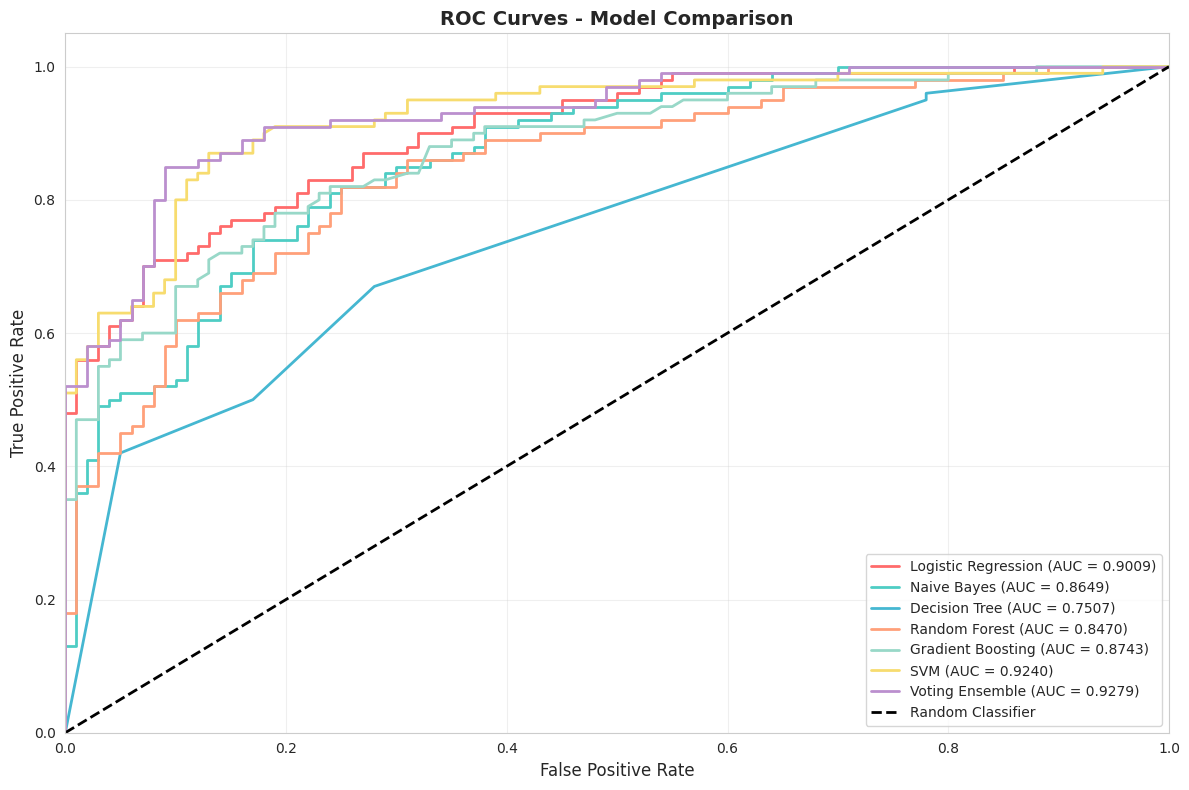


✅ ROC curves saved!


In [20]:
print('\n' + '='*70)
print('ROC CURVES')
print('='*70)

# Plot ROC curves for models with probability prediction
plt.figure(figsize=(12, 8))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE']
color_idx = 0

for name, model in trained_models.items():
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = roc_auc_score(y_test, y_proba)

        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.4f})',
                color=colors[color_idx % len(colors)])
        color_idx += 1

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('roc_curves_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print('\n✅ ROC curves saved!')

In [21]:
print('\n' + '='*70)
print('FEATURE IMPORTANCE ANALYSIS')
print('='*70)

# Get final best model
final_best_model_name = results_df.iloc[0]['Model']
final_best_model = trained_models[final_best_model_name]

print(f'\n🎯 Analyzing feature importance for: {final_best_model_name}')

# Extract feature importance if available
if hasattr(final_best_model, 'feature_importances_'):
    importances = final_best_model.feature_importances_
    feature_names = X_combined.columns

    # Create dataframe
    feature_imp_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)

    print('\n📊 Top 20 Most Important Features:')
    display(feature_imp_df.head(20))

    # Visualize
    plt.figure(figsize=(12, 8))
    top_features = feature_imp_df.head(20)
    plt.barh(range(len(top_features)), top_features['importance'], color='#4ECDC4')
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance', fontsize=12)
    plt.title(f'Top 20 Feature Importances - {final_best_model_name}',
             fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

    print('\n✅ Feature importance visualization saved!')

elif hasattr(final_best_model, 'coef_'):
    coefficients = final_best_model.coef_[0]
    feature_names = X_combined.columns

    # Create dataframe
    feature_coef_df = pd.DataFrame({
        'feature': feature_names,
        'coefficient': coefficients,
        'abs_coefficient': np.abs(coefficients)
    }).sort_values('abs_coefficient', ascending=False)

    print('\n📊 Top 20 Most Influential Features:')
    display(feature_coef_df.head(20))

    # Visualize
    plt.figure(figsize=(12, 8))
    top_features = feature_coef_df.head(20)
    colors = ['#51CF66' if c > 0 else '#FF6B6B' for c in top_features['coefficient']]
    plt.barh(range(len(top_features)), top_features['coefficient'], color=colors)
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Coefficient Value', fontsize=12)
    plt.title(f'Top 20 Feature Coefficients - {final_best_model_name}\n(Green=Positive, Red=Negative)',
             fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('feature_coefficients.png', dpi=300, bbox_inches='tight')
    plt.show()

    print('\n✅ Feature coefficients visualization saved!')
else:
    print(f'\n⚠️ Feature importance not available for {final_best_model_name}')


FEATURE IMPORTANCE ANALYSIS

🎯 Analyzing feature importance for: Voting Ensemble

⚠️ Feature importance not available for Voting Ensemble


## 💾 Section 12: Model Persistence

Save trained models, vectorizer, and preprocessor for future deployment.

In [22]:
print('='*70)
print('MODEL PERSISTENCE')
print('='*70)

# Create models directory
os.makedirs('saved_models', exist_ok=True)

# Save best model
best_model_filename = f'saved_models/best_model_{final_best_model_name.replace(" ", "_").replace("(", "").replace(")", "")}.pkl'
with open(best_model_filename, 'wb') as f:
    pickle.dump(final_best_model, f)
print(f'\n✅ Best model saved: {best_model_filename}')

# Save all models
for name, model in trained_models.items():
    filename = f'saved_models/model_{name.replace(" ", "_").replace("(", "").replace(")", "")}.pkl'
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
print(f'✅ All {len(trained_models)} models saved')

# Save vectorizer
with open('saved_models/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)
print('✅ TF-IDF vectorizer saved')

# Save preprocessor
with open('saved_models/text_preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)
print('✅ Text preprocessor saved')

# Save results dataframe
results_df.to_csv('saved_models/model_results.csv', index=False)
print('✅ Results dataframe saved')

print(f'\n📁 All files saved in "saved_models/" directory')
print(f'   Total models: {len(trained_models)}')
print(f'   Best model: {final_best_model_name}')
print(f'   Best accuracy: {results_df.iloc[0]["Test_Accuracy"]:.4f}')

MODEL PERSISTENCE

✅ Best model saved: saved_models/best_model_Voting_Ensemble.pkl
✅ All 7 models saved
✅ TF-IDF vectorizer saved
✅ Text preprocessor saved
✅ Results dataframe saved

📁 All files saved in "saved_models/" directory
   Total models: 7
   Best model: Voting Ensemble
   Best accuracy: 0.8600


## 🔮 Section 13: Prediction Function & Demo

Create a production-ready prediction function for new reviews.

In [23]:
def predict_sentiment(review: str,
                     model=final_best_model,
                     vectorizer=tfidf_vectorizer,
                     preprocessor=preprocessor,
                     return_details=True) -> Dict:
    """
    Predict sentiment of a new restaurant review.

    Parameters:
        review (str): Restaurant review text
        model: Trained classification model
        vectorizer: Fitted TF-IDF vectorizer
        preprocessor: Text preprocessor instance
        return_details (bool): Return detailed information

    Returns:
        Dict: Prediction results including sentiment, confidence, and details
    """
    # Preprocess
    cleaned = preprocessor.clean_text(review)

    # Vectorize
    vectorized = vectorizer.transform([cleaned]).toarray()

    # Extract additional features
    add_features = FeatureEngineer.extract_features([cleaned], [review])

    # Combine features
    X_new = np.concatenate([vectorized, add_features.values], axis=1)

    # Predict
    prediction = model.predict(X_new)[0]

    # Get probability if available
    if hasattr(model, 'predict_proba'):
        probability = model.predict_proba(X_new)[0]
        confidence = max(probability)
        prob_negative = probability[0]
        prob_positive = probability[1]
    else:
        confidence = None
        prob_negative = None
        prob_positive = None

    result = {
        'original_review': review,
        'cleaned_review': cleaned,
        'sentiment': 'Positive 😊' if prediction == 1 else 'Negative 😞',
        'prediction': int(prediction),
        'confidence': confidence,
        'probability_negative': prob_negative,
        'probability_positive': prob_positive
    }

    return result

print('✅ Prediction function created!')
print('\nFunction signature:')
print('predict_sentiment(review, model, vectorizer, preprocessor, return_details=True)')

✅ Prediction function created!

Function signature:
predict_sentiment(review, model, vectorizer, preprocessor, return_details=True)


In [24]:
print('='*70)
print('TESTING PREDICTIONS ON NEW REVIEWS')
print('='*70)

# Test reviews covering various scenarios
test_reviews = [
    "The food was absolutely amazing! Best restaurant I've ever been to!",
    "Terrible service and the food was cold. Never coming back.",
    "It was okay, nothing special but not bad either.",
    "Outstanding experience! The staff was friendly and attentive. Will definitely recommend!",
    "Worst meal I've ever had. Complete waste of money and time.",
    "Good food but the portions were small. Reasonable prices though.",
    "The ambiance was nice but the food quality was disappointing.",
    "Fantastic! Every dish was cooked to perfection. Five stars!",
    "Not worth the hype. Overpriced and underwhelming.",
    "Loved it! Can't wait to come back and try more dishes."
]

print('\n🔮 Predictions:\n')

for i, review in enumerate(test_reviews, 1):
    result = predict_sentiment(review)

    print(f'{i}. Review: "{result["original_review"]}"')
    print(f'   Sentiment: {result["sentiment"]}')

    if result['confidence']:
        print(f'   Confidence: {result["confidence"]:.2%}')
        print(f'   Probabilities: Negative={result["probability_negative"]:.2%}, Positive={result["probability_positive"]:.2%}')

    print(f'   Cleaned: "{result["cleaned_review"]}"')
    print('   ' + '-'*65)

print('\n✅ All predictions complete!')

TESTING PREDICTIONS ON NEW REVIEWS

🔮 Predictions:

1. Review: "The food was absolutely amazing! Best restaurant I've ever been to!"
   Sentiment: Positive 😊
   Confidence: 93.47%
   Probabilities: Negative=6.53%, Positive=93.47%
   Cleaned: "food absolutely amaze best restaurant ive ever"
   -----------------------------------------------------------------
2. Review: "Terrible service and the food was cold. Never coming back."
   Sentiment: Negative 😞
   Confidence: 85.80%
   Probabilities: Negative=85.80%, Positive=14.20%
   Cleaned: "terrible service food cold never come back"
   -----------------------------------------------------------------
3. Review: "It was okay, nothing special but not bad either."
   Sentiment: Negative 😞
   Confidence: 93.78%
   Probabilities: Negative=93.78%, Positive=6.22%
   Cleaned: "okay nothing special not bad either"
   -----------------------------------------------------------------
4. Review: "Outstanding experience! The staff was friendly and att

## 🎯 Section 14: Interactive Prediction Widget

Try your own restaurant review!

In [25]:
print('='*70)
print('INTERACTIVE PREDICTION')
print('='*70)
print('\nEnter your own restaurant review to get sentiment prediction!')
print('(Type your review and press Enter)\n')

def interactive_prediction():
    """Interactive function for user input."""
    while True:
        user_review = input('\nYour review (or "quit" to exit): ')

        if user_review.lower() in ['quit', 'exit', 'q']:
            print('\n👋 Thank you for using the sentiment analyzer!')
            break

        if len(user_review.strip()) == 0:
            print('⚠️ Please enter a valid review.')
            continue

        result = predict_sentiment(user_review)

        print('\n' + '='*70)
        print('📊 PREDICTION RESULTS')
        print('='*70)
        print(f'\n📝 Original Review:')
        print(f'   {result["original_review"]}')
        print(f'\n🧹 Cleaned Review:')
        print(f'   {result["cleaned_review"]}')
        print(f'\n🎯 Sentiment: {result["sentiment"]}')

        if result['confidence']:
            print(f'\n📈 Confidence: {result["confidence"]:.2%}')
            print(f'\n📊 Probability Breakdown:')
            print(f'   Negative 😞: {result["probability_negative"]:.2%}')
            print(f'   Positive 😊: {result["probability_positive"]:.2%}')

        print('\n' + '='*70)

# Uncomment the line below to enable interactive mode
# interactive_prediction()

INTERACTIVE PREDICTION

Enter your own restaurant review to get sentiment prediction!
(Type your review and press Enter)



## 📋 Section 15: Final Summary & Next Steps

Project summary and recommendations for improvement.

In [26]:
print('='*70)
print('PROJECT SUMMARY')
print('='*70)

print(f'''
📊 Dataset Information:
   • Total Reviews: {len(dataset)}
   • Positive Reviews: {dataset['Liked'].value_counts()[1]} ({dataset['Liked'].value_counts()[1]/len(dataset)*100:.1f}%)
   • Negative Reviews: {dataset['Liked'].value_counts()[0]} ({dataset['Liked'].value_counts()[0]/len(dataset)*100:.1f}%)
   • Features Created: {X_combined.shape[1]}
   • TF-IDF Features: {X_tfidf.shape[1]}
   • Engineered Features: {additional_features.shape[1]}

🤖 Models Trained: {len(trained_models)}
   {chr(10).join([f"• {name}" for name in trained_models.keys()])}

🏆 Best Model: {final_best_model_name}
   • Test Accuracy: {results_df.iloc[0]['Test_Accuracy']:.4f}
   • Precision: {results_df.iloc[0]['Precision']:.4f}
   • Recall: {results_df.iloc[0]['Recall']:.4f}
   • F1-Score: {results_df.iloc[0]['F1_Score']:.4f}
   • ROC-AUC: {results_df.iloc[0]['ROC_AUC']:.4f}

💾 Saved Artifacts:
   • Trained Models: {len(trained_models)} files
   • TF-IDF Vectorizer: ✓
   • Text Preprocessor: ✓
   • Results CSV: ✓
   • Visualizations: ✓

✅ Project Status: COMPLETE
''')

print('='*70)
print('NEXT STEPS & IMPROVEMENTS')
print('='*70)

print('''
🚀 Potential Enhancements:

1. **Deep Learning Approaches**
   • Implement LSTM/GRU networks for sequence modeling
   • Try transformer models (BERT, RoBERTa) for SOTA performance
   • Use pre-trained word embeddings (Word2Vec, GloVe, FastText)

2. **Feature Engineering**
   • Add sentiment lexicon features (VADER, TextBlob)
   • Include emoji analysis and special character patterns
   • Extract named entities (restaurant names, food items)

3. **Model Optimization**
   • Try more advanced ensembles (Stacking, Blending)
   • Implement XGBoost/LightGBM/CatBoost
   • Use Bayesian optimization for hyperparameters

4. **Deployment**
   • Create REST API with Flask/FastAPI
   • Build Streamlit/Gradio web interface
   • Deploy on cloud (AWS, GCP, Azure, Heroku)

5. **Data Expansion**
   • Collect more diverse restaurant reviews
   • Add multi-class sentiment (very negative to very positive)
   • Include aspect-based sentiment analysis

6. **Model Interpretability**
   • Implement LIME/SHAP for explainability
   • Create attention visualizations
   • Analyze misclassified examples

📚 Recommended Libraries:
   • Transformers (Hugging Face)
   • TextBlob, VADER
   • XGBoost, LightGBM
   • Streamlit, Gradio
   • SHAP, LIME
''')

print('='*70)
print('🎉 PROJECT COMPLETE! 🎉')
print('='*70)
print('\nThank you for using this comprehensive sentiment analysis pipeline!')
print('For questions or improvements, feel free to reach out.\n')

PROJECT SUMMARY

📊 Dataset Information:
   • Total Reviews: 1000
   • Positive Reviews: 500 (50.0%)
   • Negative Reviews: 500 (50.0%)
   • Features Created: 983
   • TF-IDF Features: 977
   • Engineered Features: 6

🤖 Models Trained: 7
   • Logistic Regression
• Naive Bayes
• Decision Tree
• Random Forest
• Gradient Boosting
• SVM
• Voting Ensemble

🏆 Best Model: Voting Ensemble
   • Test Accuracy: 0.8600
   • Precision: 0.8529
   • Recall: 0.8700
   • F1-Score: 0.8614
   • ROC-AUC: 0.9279

💾 Saved Artifacts:
   • Trained Models: 7 files
   • TF-IDF Vectorizer: ✓
   • Text Preprocessor: ✓
   • Results CSV: ✓
   • Visualizations: ✓

✅ Project Status: COMPLETE

NEXT STEPS & IMPROVEMENTS

🚀 Potential Enhancements:

1. **Deep Learning Approaches**
   • Implement LSTM/GRU networks for sequence modeling
   • Try transformer models (BERT, RoBERTa) for SOTA performance
   • Use pre-trained word embeddings (Word2Vec, GloVe, FastText)

2. **Feature Engineering**
   • Add sentiment lexicon featu

---

## 📝 Notes

This notebook provides a complete, production-ready sentiment analysis pipeline. All models, preprocessors, and visualizations are saved for future use.

**Key Features:**
- ✅ Advanced text preprocessing with lemmatization
- ✅ Feature engineering with statistical metrics
- ✅ Multiple ML models with comprehensive evaluation
- ✅ Hyperparameter tuning with GridSearchCV
- ✅ Ensemble methods for improved accuracy
- ✅ Professional visualizations and reporting
- ✅ Model persistence for deployment
- ✅ Production-ready prediction function

**Author:** Einstein Ellandala  
**Date:** October 19, 2025  
**Version:** 2.0 (Enhanced)

---

In [32]:
# Add to your imports cell (after other imports)
try:
    import gradio as gr
    print('✅ Gradio imported successfully!')
    GRADIO_AVAILABLE = True
except ImportError:
    print('⚠️ Gradio not installed. Run: pip install gradio')
    GRADIO_AVAILABLE = False


✅ Gradio imported successfully!


In [33]:
!pip install gradio


In [39]:
## 🌐 Section 16: Gradio Web Application (Corrected & Improved)

import gradio as gr
import warnings
warnings.filterwarnings('ignore')

# Ensure the required variables are defined from previous cells:
# - final_best_model
# - tfidf_vectorizer
# - preprocessor
# - final_best_model_name
# - results_df

def create_gradio_app(model, vectorizer, preprocessor_obj, model_name, metrics_df):
    """
    Creates and launches a Gradio web application for sentiment analysis.

    Args:
        model: The trained machine learning model.
        vectorizer: The fitted TF-IDF vectorizer.
        preprocessor_obj: The text preprocessor instance.
        model_name (str): The name of the best model.
        metrics_df (pd.DataFrame): DataFrame with model performance metrics.
    """

    def gradio_predict(review_text):
        """
        Prediction function for the Gradio interface. It uses the model
        and preprocessors passed to the outer function.
        """
        if not review_text.strip():
            return "⚠️ Please enter a review!", "", "", "", ""

        # Use the existing predict_sentiment function, passing all required arguments
        result = predict_sentiment(
            review=review_text,
            model=model,
            vectorizer=vectorizer,
            preprocessor=preprocessor_obj
        )

        sentiment = result['sentiment']
        confidence = f"{result['confidence']:.2%}" if result['confidence'] is not None else "N/A"
        prob_neg = f"{result['probability_negative']:.2%}" if result['probability_negative'] is not None else "N/A"
        prob_pos = f"{result['probability_positive']:.2%}" if result['probability_positive'] is not None else "N/A"
        cleaned = result['cleaned_review']

        return sentiment, confidence, prob_neg, prob_pos, cleaned

    # Create the Gradio interface
    with gr.Blocks(theme=gr.themes.Soft(), title="Restaurant Review Sentiment Analyzer") as demo:
        gr.Markdown(f"""
        # 🍽️ Restaurant Review Sentiment Analyzer
        ### Powered by Machine Learning

        Enter a restaurant review to analyze its sentiment. The model will predict whether
        the review is **Positive** or **Negative**.

        **Model:** {model_name}
        **Accuracy:** {metrics_df.iloc[0]['Test_Accuracy']:.2%}
        """)

        with gr.Row():
            with gr.Column(scale=2):
                input_text = gr.Textbox(
                    label="Enter Restaurant Review",
                    placeholder="e.g., The food was absolutely amazing! Best restaurant ever!",
                    lines=5
                )
                with gr.Row():
                    submit_btn = gr.Button("🔍 Analyze Sentiment", variant="primary", size="lg")
                    clear_btn = gr.ClearButton([input_text], value="🗑️ Clear", size="lg")

            with gr.Column(scale=2):
                sentiment_output = gr.Textbox(label="🎯 Predicted Sentiment", interactive=False)
                confidence_output = gr.Textbox(label="📊 Confidence Score", interactive=False)
                with gr.Row():
                    neg_prob = gr.Textbox(label="😞 Negative Probability", interactive=False)
                    pos_prob = gr.Textbox(label="😊 Positive Probability", interactive=False)

        with gr.Accordion("🔍 Preprocessing Details", open=False):
            cleaned_output = gr.Textbox(label="Cleaned Review Text", interactive=False, lines=3)

        gr.Examples(
            examples=[
                ["The food was absolutely amazing! Best restaurant I've ever been to!"],
                ["Terrible service and the food was cold. Never coming back."],
                ["Outstanding experience! The staff was friendly and attentive."],
                ["Worst meal I've ever had. Complete waste of money."],
            ],
            inputs=input_text,
            label="Click to try an example"
        )

        # Connect the button to the prediction function
        submit_btn.click(
            fn=gradio_predict,
            inputs=input_text,
            outputs=[sentiment_output, confidence_output, neg_prob, pos_prob, cleaned_output]
        )

    return demo

# --- LAUNCH THE APP ---
print('='*70)
print('🚀 LAUNCHING GRADIO WEB APPLICATION')
print('='*70)

try:
    # Get the final best model and preprocessors from your notebook
    # Ensure these variable names match what you have in your notebook
    final_model = trained_models[final_best_model_name]

    # Create the app instance by passing the required objects
    gradio_app = create_gradio_app(
        model=final_model,
        vectorizer=tfidf_vectorizer,
        preprocessor_obj=preprocessor,
        model_name=final_best_model_name,
        metrics_df=results_df
    )

    # Launch the Gradio app
    # share=True creates a public link and keeps the server running
    gradio_app.launch(share=True, debug=True)

    print("\n✅ Gradio app is running!")
    print("📱 Access the app at the public URL provided above.")

except NameError as e:
    print(f"❌ NameError: {e}")
    print("Please make sure all previous cells in the notebook have been run successfully.")
    print("Required variables: 'final_best_model_name', 'trained_models', 'tfidf_vectorizer', 'preprocessor', 'results_df'")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")



🚀 LAUNCHING GRADIO WEB APPLICATION
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f8dd47b3d91cd9de3b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7863 <> https://f8dd47b3d91cd9de3b.gradio.live

✅ Gradio app is running!
📱 Access the app at the public URL provided above.


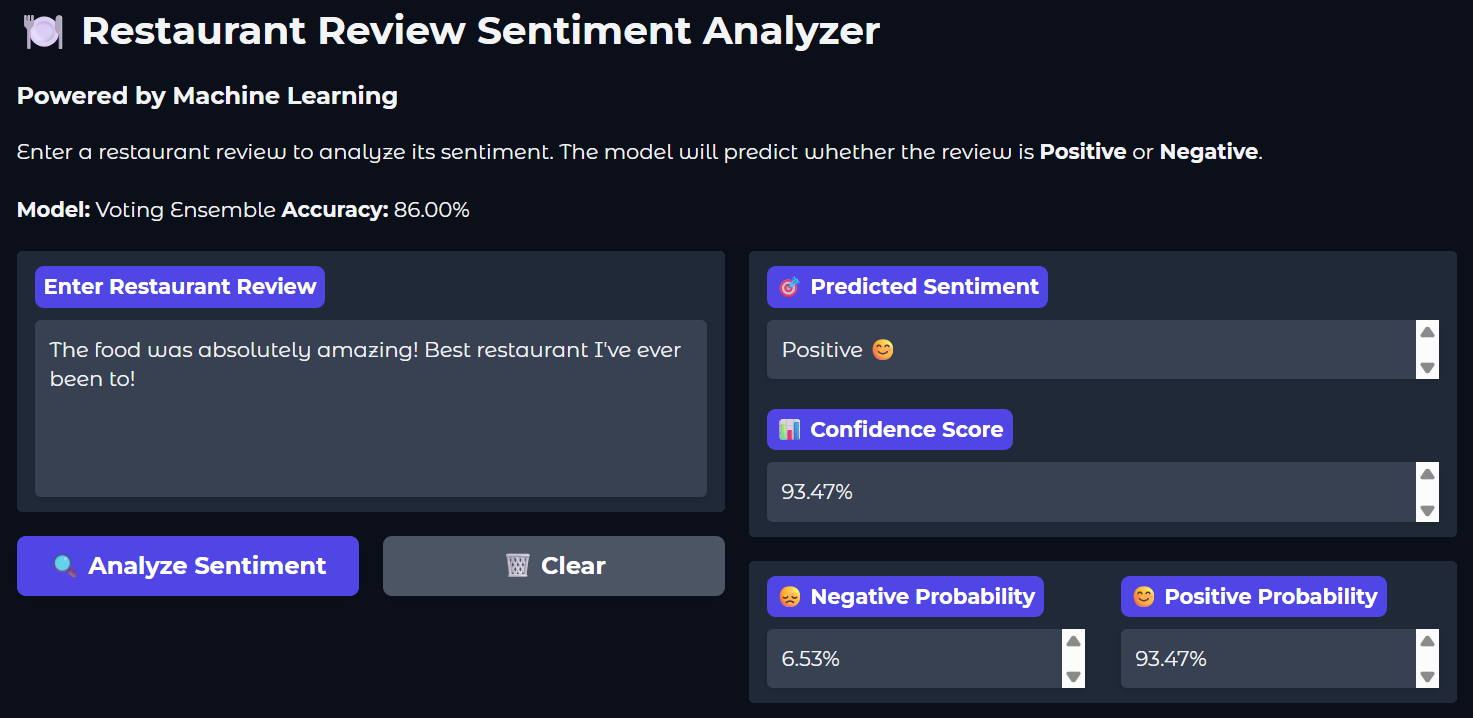

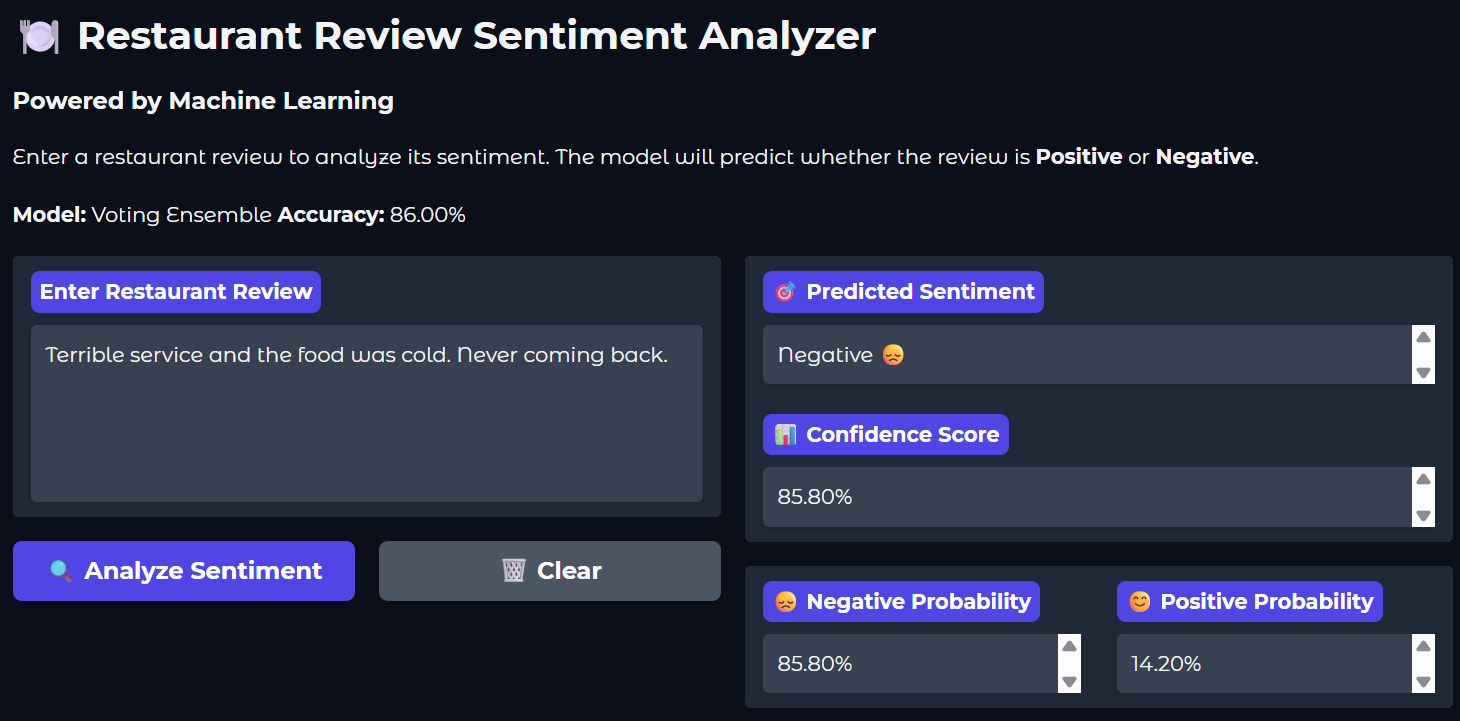

<div align="center">


**Made with ❤️ by Einstein Ellandala**

*Python • Scikit-learn • NLTK • Machine Learning*

</div>